<a href="https://colab.research.google.com/github/Naitik582/oibsip_taskno--Level-1-Project-4-/blob/main/Twitter_Data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("\033[1mImport Libraries\033[0m")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

Import Libraries


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print ("\033[1mLoad The Dataset\033[0m")
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Twitter_Data.csv')

df.head()

Load The Dataset


Saving Twitter_Data.csv to Twitter_Data.csv


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
df = df.dropna(subset=['clean_text', 'category'])

df['category'] = df['category'].astype(int)


stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)


df['clean_text'] = df['clean_text'].apply(clean_text)


df.head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1
1,talk nonsense continue drama vote modi,0
2,say vote modi welcome bjp told rahul main camp...,1
3,asking supporters prefix chowkidar names modi ...,1
4,answer among powerful world leader today trump...,1


In [7]:
vectorizer = TfidfVectorizer(max_features=5000)


X = vectorizer.fit_transform(df['clean_text'])


y = df['category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((130375, 5000), (32594, 5000))

In [8]:
model = MultinomialNB()


model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [ ]:
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[ 3119   647  3386]
 [  119  7266  3682]
 [  314   747 13314]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.44      0.58      7152
           0       0.84      0.66      0.74     11067
           1       0.65      0.93      0.77     14375

    accuracy                           0.73     32594
   macro avg       0.79      0.67      0.70     32594
weighted avg       0.77      0.73      0.72     32594



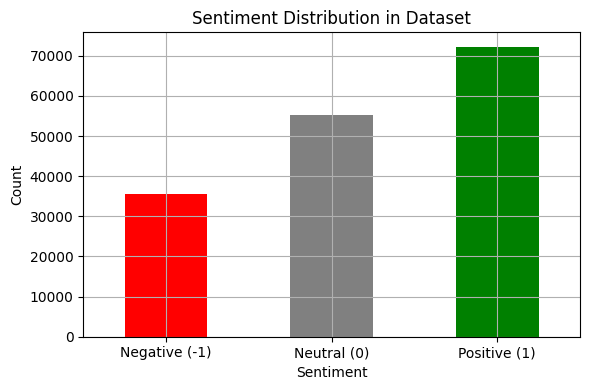

In [10]:
plt.figure(figsize=(6,4))
df['category'].value_counts().sort_index().plot(kind='bar', color=['red','gray','green'])
plt.xticks(ticks=[0,1,2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'], rotation=0)
plt.title("Sentiment Distribution in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
sample_texts = [
    "Modi is doing a great job for the country.",
    "I hate this government and its policies.",
    "Not sure what to think about the elections."
]

cleaned_samples = [clean_text(text) for text in sample_texts]

sample_features = vectorizer.transform(cleaned_samples)

predictions = model.predict(sample_features)

for text, pred in zip(sample_texts, predictions):
    sentiment = { -1: "Negative", 0: "Neutral", 1: "Positive" }.get(pred, "Unknown")
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Text: Modi is doing a great job for the country.
Predicted Sentiment: Positive

Text: I hate this government and its policies.
Predicted Sentiment: Negative

Text: Not sure what to think about the elections.
Predicted Sentiment: Positive

